# Segregation and Peer Effects
Prince Javier
<br>In this notebook we explore 
* segregation model by Schelling (1971) https://www.stat.berkeley.edu/~aldous/157/Papers/Schelling_Seg_Models.pdf
* threshold models by Granovetter (1978) https://sociology.stanford.edu/publications/threshold-models-collective-behavior
* standing ovation model by Miller and Page (2004) http://www2.econ.iastate.edu/tesfatsi/StandingOvation.MillerPage.pdf

Hopefully by doing experiments on these models, we get some new ways of thinking about collective behavior and how outcomes may not necessarily be intuitive by looking at average behaviors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# custom functions
from scripts.segregate_1d import segregate_1d, plot1d
from scripts.segregate_2d import segregate_2d, plot2d
from scripts.segregate_bounded import segregate_bounded, plot_bounded, thresh_dist
from scripts.run_thresh_sim import plot_thresh_gif, linear_dist, norm_dist, inv_norm_dist, exp_dist, run_thresh_sim
from scripts.standing_ovation import standing_ovation, plot_standing_ovation

import warnings # suppress all warnings
warnings.filterwarnings("ignore")

/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Segregation
<br>Segregation between different people has always been and continue to be an interesting topic. Schelling in his 1971 paper, "Dynamic Models of Segregation" examined the dynamics of segregation via an agent-based modelling approach that led him to interesting insights.

In this section, we will replicate his work. Here are some guide questions for this exercise:
* If individuals segregate into highly polarized groups, does that mean that they dislike the other group, e.g. racists?
* Is it possible for relatively tolerant individuals to form highly-segmented groupings?
* If say we have the same population for agents 1 and 2, and they both have a threshold of 20% (they need 20% of their neighbors to be like them for them to be happy), what do you think will be average proportions of like-neighbors per agent?
* If the populations of the two agents are not the same, e.g. we have a minority class, what will happen to the segregation patterns and proportions?
* What if we limit movement such that agents can only move into vacant areas in their vicinity, how will this affect segregation?
* Can we necessarily infer collective behavior from average statistics, e.g. average mixing preference/thresholds? 
* Can we necessarily infer individual preferences/thresholds from collective behavior?

### Segregation in 1D
Schelling began his model by introducing a 1-dimensional model with two types of agents (black and white) on a line.

* Objective - the agents will move into positions that will make all / most of them happy
* Rules
    * From the current positions, an unhappy agent is randomly selected (Schelling selected from left to right)
    * That agent will them randomly select a vacant position that will make the agent happy
        * In Schelling's 1D set up, there were no vacant areas and the agent looks for points between other agents where it can squeeze itself into
        * Moving into vacant areas on the othat hand is more intuitive because we can think of them as empty houses people move into. You don't really make your own space by squeezing into two occupied houses.
        * This rule is applied in Schelling's 2D model
    * We repeat until we reach stability (nobody moves) or few people move (if there's no fixed stability)
* Given
    * `p` - a fixed proportion of agent 1, agent 2, and empty spaces (houses)
    * `n` - linear neighborhood (1 dimension) randomly populated by n agents and some empty spaces
    * `thresholds` - A fixed set of thresholds of the minimum proportion of similar nearby neighbors for each agent that will make them happy
    * `k` - The distance to the left and right, k, from the agent that defines nearby neighbors. Those at the far left, will have no nearby neighbors to the left and k nearby neighbors to the right
    * `travel_lim` - True/False whether we limit the travel to k or not    

#### Impact of Thresholds
* Given k=4, n=70 (Schelling's params), and equal number of agents, Even if say, we fix at 50% thresholds to be in a neighborhood with similar neighbors (so they will be fine with a mixed neighborhood), they still tend tend to segregate so the average proportion of like neighbors in the vicinity of each agent become 94% (Schelling saw 81%).
* To answer our question above, even if the thresholds are as low as 20% each, the average proportion of like neighbors become 60%. Schelling called these results "striking"

final avg similarities agent 1, agent 2, all  0.980246913580247 0.9833333333333334 0.9816993464052288


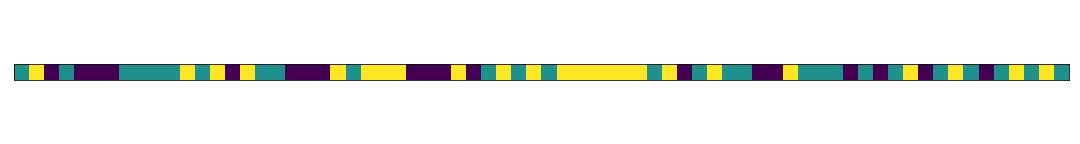

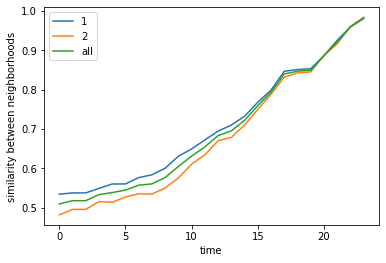

In [2]:
params = dict(n=70, 
              k=4,              
              agents=[0, 1, 2], 
              props=[0.20, 0.4, 0.4],
              thresholds=[0, 0.5, 0.5],
              num_iters=100,
              travel_lim=False,
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)        
plot1d(avg_sim1, avg_sim2, avg_sim, params)

100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


Text(0.5, 0.98, 'neighborhood similarity')

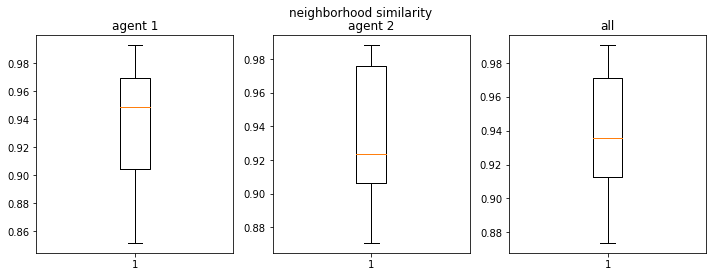

In [3]:
# for prop = 0.5
# let us check the "consistency" of this result by running multiple iterations 
# and looking at the distribution of final similarity proportions

final_props_1 = []
final_props_2 = []
final_props_all = []

for s in tqdm(range(20)): # tqdm handy for showing progress bar
    params = dict(n=70, 
                  k=4,              
                  agents=[0, 1, 2], 
                  props=[0.20, 0.4, 0.4],
                  thresholds=[0, 0.5, 0.5],
                  num_iters=100,
                  travel_lim=False,                  
                  seed=s)
    avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)
    final_props_1.append(avg_sim1[-1])
    final_props_2.append(avg_sim2[-1])
    final_props_all.append(avg_sim[-1])
    
f, axs = plt.subplots(1, 3, figsize=(12, 4))
agent_names = ['agent 1', 'agent 2', 'all']
i = 0
for data, ax in zip([final_props_1, final_props_2, final_props_all], axs):
    ax.boxplot(data) 
    ax.set_title(agent_names[i])
    i+=1
plt.suptitle('neighborhood similarity')    

100%|██████████| 20/20 [00:08<00:00,  2.34it/s]


Text(0.5, 0.98, 'neighborhood similarity')

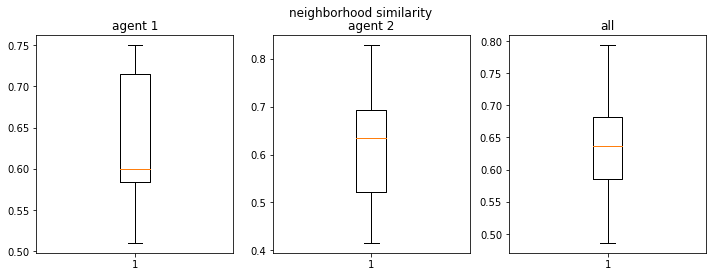

In [4]:
# for prop = 0.2
# let us check the "consistency" of this result by running multiple iterations 
# and looking at the distribution of final similarity proportions

final_props_1 = []
final_props_2 = []
final_props_all = []

for s in tqdm(range(20)): # tqdm handy for showing progress bar
    params = dict(n=70, 
                  k=4,              
                  agents=[0, 1, 2], 
                  props=[0.20, 0.4, 0.4],
                  thresholds=[0, 0.2, 0.2],
                  num_iters=100,
                  travel_lim=False,                  
                  seed=s)
    avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)
    final_props_1.append(avg_sim1[-1])
    final_props_2.append(avg_sim2[-1])
    final_props_all.append(avg_sim[-1])
    
f, axs = plt.subplots(1, 3, figsize=(12, 4))
agent_names = ['agent 1', 'agent 2', 'all']
i = 0
for data, ax in zip([final_props_1, final_props_2, final_props_all], axs):
    ax.boxplot(data) 
    ax.set_title(agent_names[i])
    i+=1
plt.suptitle('neighborhood similarity')    

#### Impact of Having a Minority Class
* At 50% thresholds for all agents, the median neighborhood similarity for the minority is over 80% (the minority can aggregate) but there are outliers when the minority never aggregates (which is a case when the vacancies are uniformly spread apart)
* There is a large variation in outcomes for the minority group, which means the changing the initial state may result in very different outcomes, and hence the equilibrium is not as "stable"
* If we make the threshold conservative e.g. 20% for all, we find that the minority does not need to aggregate into one cluster and over 30% similarity is enough though still higher than the 20% value

final avg similarities agent 1, agent 2, all  0.4992063492063492 0.9302116402116402 0.8795051353874882


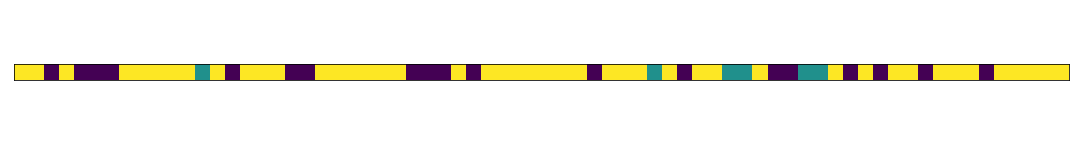

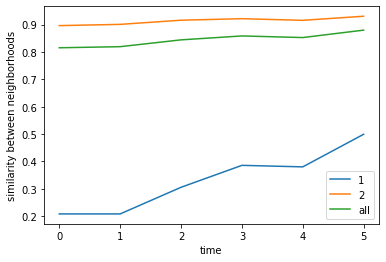

In [5]:
# what if we look at skewed population proportions?
# Schelling used 10% minority
params = dict(n=70,
              k=4,              
              agents=[0, 1, 2], 
              props=[0.2, 0.10, 0.70], # we need it enough vacant areas
              thresholds=[0, 0.2, 0.2], # we make this conservative
              num_iters=100,
              travel_lim=False,              
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)        
plot1d(avg_sim1, avg_sim2, avg_sim, params)

100%|██████████| 20/20 [00:29<00:00,  1.45s/it]


Text(0.5, 0.98, 'neighborhood similarity')

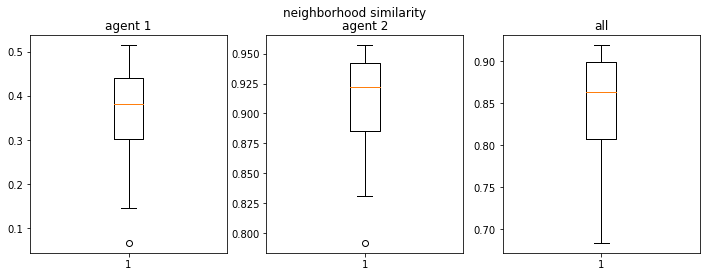

In [6]:
# for prop = 0.5
# let us check the "consistency" of this result by running multiple iterations 
# and looking at the distribution of final similarity proportions

final_props_1 = []
final_props_2 = []
final_props_all = []

for s in tqdm(range(20)): # tqdm handy for showing progress bar
    params = dict(n=70, 
                  k=4,              
                  agents=[0, 1, 2], 
                  props=[0.2, 0.10, 0.7], # we need it enough vacant areas
                  thresholds=[0, 0.2, 0.2], # we make this conservative, say 0.2
                  num_iters=100,
                  travel_lim=False,
                  seed=s)
    avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)
    final_props_1.append(avg_sim1[-1])
    final_props_2.append(avg_sim2[-1])
    final_props_all.append(avg_sim[-1])
    
f, axs = plt.subplots(1, 3, figsize=(12, 4))
agent_names = ['agent 1', 'agent 2', 'all']
i = 0
for data, ax in zip([final_props_1, final_props_2, final_props_all], axs):
    ax.boxplot(data) 
    ax.set_title(agent_names[i])
    i+=1
plt.suptitle('neighborhood similarity')    

#### Travel limits
* Even if we limit mobility to only the nearest vacant positions, we find that for a given threshold (50%) and proportion (1:1) of agents, we still reach around 80% similarity proportions per agent.
* Schelling claimed this can be a proxy for "organized movement" where individuals do not move too far apart and thus tend to cluster. He also claimed this can be a proxy for "anticipatory behavior" where agents can only move to nearby areas even if they're not yet happy, in anticipation of more people coming in.


final avg similarities agent 1, agent 2, all  0.8884615384615385 0.8569444444444444 0.8733333333333333


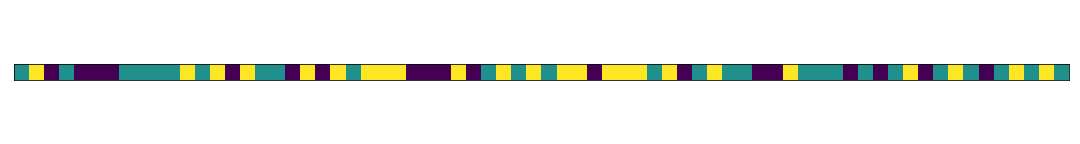

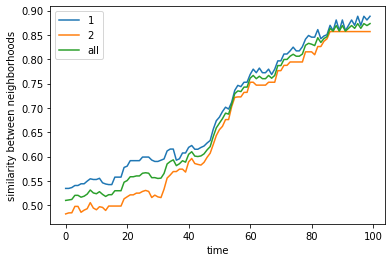

In [7]:
params = dict(n=70, 
              k=4,              
              agents=[0, 1, 2], 
              props=[0.20, 0.4, 0.4],
              thresholds=[0, 0.5, 0.5],
              num_iters=100,
              travel_lim=True,
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)        
plot1d(avg_sim1, avg_sim2, avg_sim, params)

100%|██████████| 20/20 [01:16<00:00,  3.83s/it]


Text(0.5, 0.98, 'neighborhood similarity')

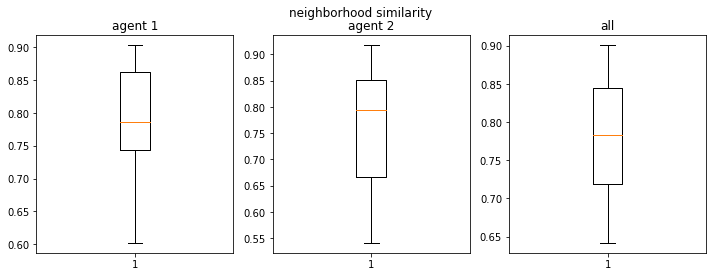

In [8]:
# let us check the "consistency" of this result by running multiple iterations 
# and looking at the distribution of final similarity proportions

final_props_1 = []
final_props_2 = []
final_props_all = []

for s in tqdm(range(20)): # tqdm handy for showing progress bar
    params = dict(n=70, 
                  k=4,              
                  agents=[0, 1, 2], 
                  props=[0.20, 0.4, 0.4],
                  thresholds=[0, 0.5, 0.5],
                  num_iters=100,
                  travel_lim=True,
                  seed=s)
    avg_sim1, avg_sim2, avg_sim = segregate_1d(**params)
    final_props_1.append(avg_sim1[-1])
    final_props_2.append(avg_sim2[-1])
    final_props_all.append(avg_sim[-1])
    
f, axs = plt.subplots(1, 3, figsize=(12, 4))
agent_names = ['agent 1', 'agent 2', 'all']
i = 0
for data, ax in zip([final_props_1, final_props_2, final_props_all], axs):
    ax.boxplot(data) 
    ax.set_title(agent_names[i])
    i+=1
plt.suptitle('neighborhood similarity')    

### Segregation in 2D
The 1D model already gives us insights on "emergent" properties of groups that cannot immediately be inferred from individual dispositions (thresholds). But things get much more interesting when we look at 2D models. Where we can see more interesting patterns. Besides, a 2D model arguably captures reality better since people move in space.

An intuitive way to think about this model is that each cell is a house that's either empty or occupied by an agent. Agents will then move from house to house in order to reach the set required proportion of nearby neighbors.

* Objective - the agents will move into positions that will make all / most of them happy
* Rules:
    * There are two agents who can move around into vacant spaces
    * Agents are either happy or unhappy
        * They are happy if the mix neighbors surrounding them are at least as good as desired (threshold)
        * If they are happy they will stay in their position
        * Unhappy agents are selected randomly and 
    * Agents belonging to the same class will all have the same threshold, but the two classes may have different thresholds - this was Schelling's constraint for this exercise
* Given
    * `props` - a fixed proportion of agent 1, agent 2, and empty spaces (houses)
    * `n` - the dinemsion of one side of a square neighborhood randomly populated by n agents and some empty spaces
    * `thresholds` - A fixed set of thresholds of the minimum proportion of similar nearby neighbors for each agent that will make them happy
    * `thresholds_max` - the maximum proportion of like neighbors near an agent (default = None)
    * `kernels` - the length of a side of a square matrix around an agent to identify nearby neighbors
    * `travel_lim` - True/False whether we limit the travel to only within a kernel x kernel matrix around the agent or not        



#### 50% Demands Lead to 90% Segregation
This is a non-intuitive outcome that we see. Despite each individual having only a requirement of 50% similar individuals in the neighborhood, the collective interaction leads to disproportionate segregation. Our agents aren't racist yet the outcome's different.

In [10]:
n = 100

all happy
final avg similarities agent 1, agent 2, all  0.8961165683829964 0.8949959350649063 0.8955571858964405


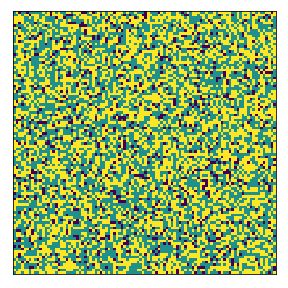

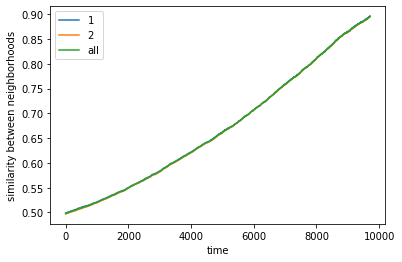

In [11]:
# even if say the thresholds of agents are 50%, we see that segregation approaches 90%
params = dict(n=n, 
              kernels=[5, 5],              
              agents=[0, 1, 2], 
              props=[0.10, 0.45, 0.45],
              thresholds=[0.5, 0.5],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False, # requires the same kernel sizes
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

#### Imposing a Travel Restriction Still Leads to Clustering But Slower
If we limit movement to the kernel size (local neighborhood) at a time, we still get clustering though slower.
<br>More but smaller clusters tend to form compared to no travel restrictions.

all happy
final avg similarities agent 1, agent 2, all  0.6374223354224858 0.6360357782030129 0.6367302126623822


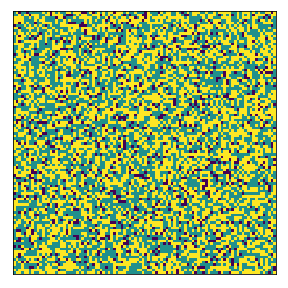

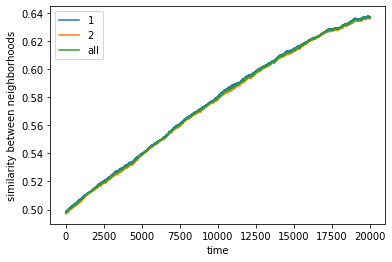

In [12]:
params = dict(n=n, 
              kernels=[5, 5],              
              agents=[0, 1, 2], 
              props=[0.10, 0.45, 0.45],
              thresholds=[0.5, 0.5],
              thresholds_max=None,              
              num_iters=20000,
              travel_lim=True, # requires the same kernel sizes
              save_step=1000, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

#### Increasing Local Neighborhood Considered Increases Cluster Size
If an agent's demand/threshold is based on a larger area, they will tend to form larger clusters

In [ ]:
# even with the same thresholds, increading the neighborhood size creates larger clusters
params = dict(n=n, 
              kernels=[13, 13],              
              agents=[0, 1, 2], 
              props=[0.10, 0.45, 0.45],
              thresholds=[0.5, 0.5],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False,
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

#### Hard to find an "equilibrium" if both agents have high demands
This is especially the case if there's limited free space.

In [ ]:
# if both classes have very high thresholds, a stable equilibrium is harder to reach with limited space
# the demands/thresholds add up to over one and with limited space, we may not be able to find a "static" equilibrium
params = dict(n=n, 
              kernels=[5, 5],              
              agents=[0, 1, 2], 
              props=[0.10, 0.45, 0.45],
              thresholds=[0.8, 0.8],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False,
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim)

In [ ]:
# if both classes have very high thresholds, a stable equilibrium is harder to reach with limited space
# however, it becomes easier when there is a lot of space
params = dict(n=n, 
              kernels=[5, 5],              
              agents=[0, 1, 2], 
              props=[0.50, 0.25, 0.25],
              thresholds=[0.8, 0.8],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False,
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

#### A more demanding group will cluster more than a less demanding group
However, an equilibrium might be harder to achieve with limited space.
An equilibrium can be achieved with a lot of space

In [ ]:
# if there's a class with a very high demand/threshold, and the other low threshold we might reach equilibrium much more slowly
# the more demanding one, will have higher clustering/density
params = dict(n=n, 
              kernels=[5,5],              
              agents=[0, 1, 2], 
              props=[0.10, 0.45, 0.45],
              thresholds=[0.3, 0.6],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False,
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

In [ ]:
# freeing up some space
# the more demanding one, will have higher clustering/density
params = dict(n=n, 
              kernels=[5,5],              
              agents=[0, 1, 2], 
              props=[0.5, 0.25, 0.25],
              thresholds=[0.3, 0.6],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False,
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

#### Equal Demands, Unequal Numbers
The minority, requiring similar neighbors, will thus cluster together into fewer but more dense clusters. The minority will start from being sparse into larger and larger groups. Schelling notes that "The minority tends to accumulate in denser neighborhoods than the majority"

In [ ]:
params = dict(n=n, 
              kernels=[5,5],              
              agents=[0, 1, 2], 
              props=[0.50, 0.10, 0.40], # we need space otherwise, they will be locked
              thresholds=[0.5, 0.5],
              thresholds_max=None,              
              num_iters=10000,
              travel_lim=False,
              save_step=500, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

#### Integrationist Preferences
Here, we add a limit to the maximum proportion desired around the agent
<br>We observe some aspects that Schelling also observed
* "More individuals may be incapable of being satisfied" or an equilibrium is harder to reach
* If there is a minority, they are "rationed" or shared among the majority members. Thus no big clusters form
* It might seem that segregation is much more "static" or "stable" than integration

In [ ]:
params = dict(n=n, 
              kernels=[5,5],              
              agents=[0, 1, 2], 
              props=[0.10, 0.45, 0.45],
              thresholds=[0.2, 0.2],
              thresholds_max=[0.9, 0.9],
              num_iters=5000,
              travel_lim=False,
              save_step=50, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

In [ ]:
# we tried again with more empty spaces
params = dict(n=n, 
              kernels=[5,5],              
              agents=[0, 1, 2], 
              props=[0.50, 0.25, 0.25],
              thresholds=[0.2, 0.2],
              thresholds_max=[0.9, 0.9],
              num_iters=5000,
              travel_lim=False,
              save_step=50, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

In [ ]:
# we tried again with a minority
# the minority is "rationed" (no clusters formed)
params = dict(n=n, 
              kernels=[5,5],              
              agents=[0, 1, 2], 
              props=[0.50, 0.10, 0.40], # we need space otherwise, they will be locked
              thresholds=[0.2, 0.2],
              thresholds_max=[0.9, 0.9],
              num_iters=5000,
              travel_lim=False,
              save_step=10, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2, avg_sim = segregate_2d(**params)        
plot2d(avg_sim1, avg_sim2, avg_sim, params)

### Bounded Neighborhood Model
This model sets a fixed boundary for a sub-neighborhood. Everyone is concerned about the color ratio inside the sub-neighborhood and make their decision based on this value. We can interpret this model as being analogous to becoming part of a physical space or organization e.g. a restaurant, company, school, or even riots (Granovetter).

Here, Schelling introduced the concept of "tolerance" which is the proportion of same agents in the sub-neighborhood. Granovetter will later on expand on this concept which he would call "threshold."

In this variation of the model, Schelling introduced the possibility of each agent having different thresholds from each other. He further analyzed how the distributions of thresholds affect the stability and outcomes of the system i.e. proportions of agents in the sub-neighborhood.

Here, agents can move out or move in depending on the proportion of like-agents in the sub-neighborhood. Movement is ordered by lowest threshold breached.

* Objective - the agents will move into positions that will make all / most of them happy
* Rules:
    * There is/are a predefined neighborhood/s with set boundaries, we'll refer to as subneighborhoods
    * There are two agents who can move into and out these subneighborhoods
        * They stay in the neighborhood if the mix neighbors inside the neighborhood are at least as good as desired (threshold)
        * Agents leave the subneighborhood if the proportion of neighbors are no longer preferred
        * Agents move one by one and the order by which agents leave or enter based on their preferences (thresholds)  
    * Individual agents may have different thresholds following some predefined function - in this case, a linear function with thresholds from 100% (all like-neighbors needed) to 0% (no like neighbors needed)
    * Threshold distributions may be different for the two agents - but for this exercise, we assume them to be the same
* Given
    * `props` - a fixed proportion of agent 1, agent 2, and empty spaces (houses)
    * `n` - the dinemsion of one side of a square neighborhood randomly populated by n agents and some empty spaces

In [ ]:
# define a distribution
def thresh_dist(x):
    # accepts an array and applies a function
    # must be between 0 and 1
    return -x/np.max(x)+1 # decreasing slope (0 is most tolerant, last user is least toleratn)

In [ ]:
x = np.arange(100)
y = thresh_dist(x)
plt.plot(x, y)
plt.xlabel('individual agent (index)')
plt.ylabel('threshold (like neighbors / total neighbors)')

In [ ]:
# pattern for the neighborhood, 1 for subneighborhood, 0 for outside the subneighborhood
pattern = np.array([[1, 1, 1, 0, 0, 0], 
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0]])

In [ ]:
# if same threshold distributions and proportions, one might overwhelm the other after a certain point
# hard for one group to fully overwhelm another
params = dict(n=n,           
              agents=[0, 1, 2], 
              props=[0.2, 0.40, 0.40], # we need space otherwise, they will be locked
              num_iters=10000,
              pattern=pattern,
              save_step=200, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2 = segregate_bounded(**params)        
plot_bounded(avg_sim1, avg_sim2, params)

In [ ]:
# same params different trial
# if same threshold distributions and proportions,
# hard for one group to fully overwhelm another
params = dict(n=n,           
              agents=[0, 1, 2], 
              props=[0.2, 0.40, 0.40], # we need space otherwise, they will be locked
              num_iters=10000,
              pattern=pattern,
              save_step=200, # number of time steps per frame
              seed=42)
avg_sim1, avg_sim2 = segregate_bounded(**params)        
plot_bounded(avg_sim1, avg_sim2, params)

In [ ]:
# same thresholds, but slightly imbalanced proportions, 
# there's a critical point when a group immediately overwhelms the other
params = dict(n=50,           
              agents=[0, 1, 2], 
              props=[0.2, 0.45, 0.35], # we need space otherwise, they will be locked
              num_iters=10000,
              pattern=pattern,
              save_step=300, # number of time steps per frame
              seed=4)
avg_sim1, avg_sim2 = segregate_bounded(**params)        
plot_bounded(avg_sim1, avg_sim2, params)

In [ ]:
# multiple neighborhoods
# easier to reach segregation even with same proportions and thresholds
pattern = np.array([[1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [0, 0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1, 1]])

# same thresholds, but slightly imbalanced proportions, 
# there's a critical point when a group immediately overwhelms the other
params = dict(n=50,           
              agents=[0, 1, 2], 
              props=[0.2, 0.4, 0.4], # we need space otherwise, they will be locked
              num_iters=10000,
              pattern=pattern,
              save_step=300, # number of time steps per frame
              seed=1)
avg_sim1, avg_sim2 = segregate_bounded(**params)        
plot_bounded(avg_sim1, avg_sim2, params)

In [ ]:
# effect of having a lot of empty space
# we still see that eventually one overwhelms the other
pattern = np.array([[1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [1, 1, 1, 0, 0, 0],
                    [0, 0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1, 1]])

# same thresholds, but slightly imbalanced proportions, 
# there's a critical point when a group immediately overwhelms the other
params = dict(n=50,           
              agents=[0, 1, 2], 
              props=[0.5, 0.25, 0.25], # we need space otherwise, they will be locked
              num_iters=10000,
              pattern=pattern,
              save_step=500, # number of time steps per frame
              seed=2)
avg_sim1, avg_sim2 = segregate_bounded(**params)        
plot_bounded(avg_sim1, avg_sim2, params)

## Threshold Models

### Equilibrium Proportions vs Thresholds from Plots

In [ ]:
n = 50 # we make a grid of n x n individuals who are either activated or not
props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)

# threshold distributions - index is the agent, value is the threshold from lowest to highest, 
# thresh = linear_dist(props)
# thresh = norm_dist(props, mean=0.5, stdev=0.2)
# thresh = inv_norm_dist(props, mean=0.3)
thresh = exp_dist(props, a=0.05, b=-0.3, c=-0.2)

plt.hist(thresh, bins=20)
plt.show()

plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')

In [ ]:
sum(thresh < 0.2)/len(thresh) # sanity check

#### Finding Equilibrium Points from Plotting**
* Intuitively, we have a sense that the system is in equilibrium if the previous proportion of people is the same as the next proportion
* Analytically, that means that the proportion at time t $r(t) = r(t+1)$
* Visually, we can plot from an initial proportion on the x-axis upwards to find the proportion of population with <= threshold, then we can move to the 45 degree line, and back to the CDF, and so forth until we reach a stable point. The rationale is: if there are currently, 60% (x axis) activated and 80% (y-axis_ have thresholds less than or equal that, they will have to activate (move horizontally to an x-axis proportion equal to the y-axis value) and so on.

#### Observations of Equilibrium Points from Plots Below**
* For exponential distributions, we may find a stable equilibrium at a certain point between 0% and 100% activated
* For a normal distribution, equilibria tend to be either 0% or 100% activated

In [ ]:
# if initial proportion is 0.45
thresh = exp_dist(props, a=0.05, b=-0.3, c=-0.2)
plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
r1 = 0.45 # proportion at time t
r0 = 0
for i in range(10):
    r2 = sum(thresh <= r1) / len(thresh) # how many people will activate
    plt.plot([r1, r1], [r0, r2], 'g--')
    plt.plot([r2, r1], [r2, r2], 'g--')
    
    r1 = r2 # r1 is the new r2
    r0 = r2
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')    
plt.show()

plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
r1 = 0.8 # proportion at time t
r0 = 0
for i in range(10):
    r2 = sum(thresh <= r1) / len(thresh) # how many people will activate
    plt.plot([r1, r1], [r0, r2], 'g--')
    plt.plot([r2, r1], [r2, r2], 'g--')   
    r1 = r2 # r1 is the new r2
    r0 = r2
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')    
plt.show()    

In [ ]:
thresh = norm_dist(props, mean=0.5, stdev=0.2)
plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
r1 = 0.6 # proportion at time t
r0 = 0
for i in range(10):
    r2 = sum(thresh <= r1) / len(thresh) # how many people will activate
    plt.plot([r1, r1], [r0, r2], 'g--')
    plt.plot([r2, r1], [r2, r2], 'g--')
    
    r1 = r2 # r1 is the new r2
    r0 = r2
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')    
plt.show()

plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
r1 = 0.45 # proportion at time t
r0 = 0
for i in range(5):
    r2 = sum(thresh <= r1) / len(thresh) # how many people will activate
    plt.plot([r1, r1], [r0, r2], 'g--')
    plt.plot([r2, r1], [r2, r2], 'g--')   
    r1 = r2 # r1 is the new r2
    r0 = r2
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')    
plt.show()    

In [ ]:
thresh = inv_norm_dist(props, mean=0.5)
plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
r1 = 0.2 # proportion at time t
r0 = 0
for i in range(10):
    r2 = sum(thresh <= r1) / len(thresh) # how many people will activate
    plt.plot([r1, r1], [r0, r2], 'g--')
    plt.plot([r2, r1], [r2, r2], 'g--')
    
    r1 = r2 # r1 is the new r2
    r0 = r2
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')    
plt.show()

plt.plot(thresh, props)
plt.plot([0, 1], [0, 1], 'r--')
r1 = 0.45 # proportion at time t
r0 = 0
for i in range(5):
    r2 = sum(thresh <= r1) / len(thresh) # how many people will activate
    plt.plot([r1, r1], [r0, r2], 'g--')
    plt.plot([r2, r1], [r2, r2], 'g--')   
    r1 = r2 # r1 is the new r2
    r0 = r2
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')    
plt.show()    

### Visualizing the Spread

#### Exponential Distribution

In [ ]:
# visualize with cellular automata model
n = 50 # we make a grid of n x n individuals who are either activated or not

props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
thresh = exp_dist(props, a=0.05, b=-0.3, c=-0.2)

r1 = 0.45 # initial activated population
seed = 1
np.random.seed(seed)
neighborhood = np.random.choice([0, 1], size=n*n, p=[1-r1, r1]).reshape((n, n))

new_dir = f'charts/threshold/{seed}_dist_exp_r0_{r1}/'

rs = run_thresh_sim(neighborhood, props, thresh, new_dir)
plot_thresh_gif(new_dir)
plt.plot(rs)
plt.show()

In [ ]:
# visualize with cellular automata model
n = 50 # we make a grid of n x n individuals who are either activated or not

props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
thresh = exp_dist(props, a=0.05, b=-0.3, c=-0.2)

r1 = 0.6 # initial activated population
seed = 1
np.random.seed(seed)
neighborhood = np.random.choice([0, 1], size=n*n, p=[1-r1, r1]).reshape((n, n))

new_dir = f'charts/threshold/{seed}_dist_exp_r0_{r1}/'

rs = run_thresh_sim(neighborhood, props, thresh, new_dir)
plot_thresh_gif(new_dir)
plt.plot(rs)
plt.show()

#### Normal Distribution

In [ ]:
# visualize with cellular automata model
n = 50 # we make a grid of n x n individuals who are either activated or not

props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
thresh = norm_dist(props, mean=0.5, stdev=0.2)

r1 = 0.8 # initial activated population
seed = 1
np.random.seed(seed)
neighborhood = np.random.choice([0, 1], size=n*n, p=[1-r1, r1]).reshape((n, n))

new_dir = f'charts/threshold/{seed}_dist_norm_r0_{r1}/'

rs = run_thresh_sim(neighborhood, props, thresh, new_dir)
plot_thresh_gif(new_dir)
plt.plot(rs)
plt.show()

In [ ]:
# visualize with cellular automata model
n = 50 # we make a grid of n x n individuals who are either activated or not

props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
thresh = norm_dist(props, mean=0.5, stdev=0.2)

r1 = 0.45 # initial activated population
seed = 1
np.random.seed(seed)
neighborhood = np.random.choice([0, 1], size=n*n, p=[1-r1, r1]).reshape((n, n))

new_dir = f'charts/threshold/{seed}_dist_norm_r0_{r1}/'

rs = run_thresh_sim(neighborhood, props, thresh, new_dir)
plot_thresh_gif(new_dir)
plt.plot(rs)
plt.show()

### Stability of Equilibrium vs Threshold
* Even if our mean stays the same at 0.5, varying the standard deviation of thresholds varies the point at which the system reaches equilibrium
* The implication of this is we should be wary of merely looking at averages (say the average individual) to explain collective phenomena.

In [ ]:
# we test the stability of the equilibrium if we modify our thresholds a bit
# so that the mean more or less stay the same

In [ ]:
r1 = 0.2 # initial proportion
stdevs = []
r_eq = []
for stdev in np.arange(0.2, 0.8, 0.05):
    thresh = norm_dist(props, mean=0.5, stdev=stdev)
    for i in range(30):
        r2 = sum(thresh <= r1) / len(thresh) # how many people will activate    
        r1 = r2 # r1 is the new r2
    r_eq.append(r1)
    stdevs.append(stdev)
    
plt.plot(stdevs, r_eq)
plt.xlabel('standard deviation')
plt.ylabel('equilibrium proportion')

In [ ]:
stdev = 0.3
n = 100 # we make a grid of n x n individuals who are either activated or not

props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
thresh = norm_dist(props, mean=0.5, stdev=stdev)

r1 = 0.2 # initial activated population
seed = 1
np.random.seed(seed)
neighborhood = np.random.choice([0, 1], size=n*n, p=[1-r1, r1]).reshape((n, n))

new_dir = f'charts/threshold/{seed}_dist_norm_r0_{r1}_{stdev}/'

rs = run_thresh_sim(neighborhood, props, thresh, new_dir)
plot_thresh_gif(new_dir)
plt.plot(rs)
plt.show()


In [ ]:
stdev = 0.5
n = 100 # we make a grid of n x n individuals who are either activated or not

props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
thresh = norm_dist(props, mean=0.5, stdev=stdev)

r1 = 0.2 # initial activated population
seed = 1
np.random.seed(seed)
neighborhood = np.random.choice([0, 1], size=n*n, p=[1-r1, r1]).reshape((n, n))

new_dir = f'charts/threshold/{seed}_dist_norm_r0_{r1}_{stdev}/'

rs = run_thresh_sim(neighborhood, props, thresh, new_dir)
plot_thresh_gif(new_dir)
plt.plot(rs)
plt.show()


## Standing Ovation Problem
Here's a modification of Granovetter's activation model. We incorporate some rules that intuitively exist when we're simulating a standard ovation after a performance. These rules are:

* Objective - simulate a standing ovation process
* Rules
    * The audience only sees agents within a field of view. The implications are:
        * Those at the front may have the least information about the true proportion of activated users
        * Those at the far back may have the greatest information
    * Agents have a defined field of view that can be patterned after some shape e.g. cone-shaped
    * The audience can be heterogenous
        * Like in Schelling's and Granovetter's models, we can apply a threshold value to indicate 
            * the proportion of agents perceived to activate that will cause an agent to activate.
            * the threshold for the quality of the performance
        * We will follow Miller and Page's model where the quality threshold is fixed at 0.5
    * Agents cannot switch seats
    * Agents can change decisions based on new information
    * The agent stands up based on some factors
        * Each agent assesses (here, randomly generated) the quality of the performance
        * If the quality exceeds the agent's threshold the agent stands up
        * The agent who stands up from quality will remain standing
        * At t+1 onwards, agents will decide whether to stand up or not based on the proportion of agents standing up that they see
    * "Synchronous" updating is used - per time step, all agents whose thresholds are breached all stand up (or sit down)    
* Notes: Our quality assessments and threshold for peer-pressure are drawn from a normal distirbution given mean and standard deviation as parameters    
* Parameters
    * `n` - for an n x n matrix representing audience
    * `q_thresh` - quality threshold exceeding which means the agent will stand up no matter what (one threshold for all users)
    * `kernel` - the field of view of each agent indicated by zeros and ones on an m x m matrix
    * `p_mean` - the mean of a normal distribution of peer-pressure thresholds
    * `p_stdev` - the standard dev of a normal distribution of peer-pressure thresholds
    * `q_mean` - the mean of the normal distribution of performance quality assessments
    * `q_thresh` - the standard deviation of the normal distribution of performance quality assessments


We'd like to check:
* Is it possible for majority to stand up even if most agents did not like the performance?
* Stable equilibrium, i.e. proportion standing up
* Number of iterations before reaching the stable equilibrium
* Proportion of agents standing over time or the reverse: "Stick in the Muds" - proportion of people that did the opposite of the majority at steady state

In [ ]:
# parameters
n = 100 # we make a grid of n x n individuals who are either activated or not
q_thresh = 0.5 # quality threshold

In [ ]:
# then we check activation from peer pressure
# this is the cone of vision pattern around each agent
# the agent is at the center
# If we want some information leakage from the back, we may indicate with 1s
# should be (2n + 1) * (2n + 1) so it's odd and even if we get the user at the back, the user can still see the stage

kernel = np.zeros(shape=(2*n + 1, 2*n + 1))
plt.imshow(kernel)
for i in range(2*n+1):
    for j in range(2*n+1):
        if i <= n and j >= i -1 and j <= -i + 2*n+1:
            kernel[i, j] = 1
# we then exclude the middle
kernel[n, n] = 0

sns.heatmap(kernel, annot=False)
plt.show()

In [ ]:
# peer pressure threshold parameters
p_mean, p_stdev = 0.8, 0.1
# quality assessment values distribution params
q_mean, q_stdev = 0.5, 0.1

# For visualization purposes
# This is calculated in the function
# generate thresholds
props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
p_thresh = norm_dist(props, mean=p_mean, stdev=p_stdev) # agents are indices thresholds for peer pressure

# quality assessment
q_assess = norm_dist(props, mean=q_mean, stdev=q_stdev) # agents are indices thresholds for peer pressure

plt.plot(p_thresh, props)
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')
plt.show()

plt.plot(q_assess, props)
plt.xlabel('quality assessments')
plt.ylabel('cdf - prop. of population having <= quality assessment')
plt.show()

# sanity check
print('sanity check prop people having thresh < 0.6 ',sum(p_thresh<0.6)/len(p_thresh))


In [ ]:
params = dict(n=n, 
             p_mean=p_mean,
             p_stdev=p_stdev,              
             q_mean=q_mean,
             q_stdev=q_stdev, 
             q_thresh = q_thresh,
             kernel=kernel, 
             num_iters=15, 
             save_step=1, 
             seed=1)
props_standing = standing_ovation(**params)
plot_standing_ovation(**params)
plt.plot(props_standing)
plt.xlabel('time step')
plt.ylabel('proportion of users standing up')

In [ ]:
p_mean, p_stdev = 0.8, 0.1
q_mean, q_stdev = 0.5, 0.20
props = np.arange(0, 1, 1/(n**2)) # agents are indices, value is the (cumulative proportion)
p_thresh = norm_dist(props, mean=p_mean, stdev=p_stdev) # agents are indices thresholds for peer pressure
q_assess = norm_dist(props, mean=q_mean, stdev=q_stdev) # agents are indices thresholds for peer pressure

plt.plot(p_thresh, props)
plt.xlabel('thresholds / prop people activated')
plt.ylabel('cdf - prop. of population having <= threshold')
plt.show()

plt.plot(q_assess, props)
plt.xlabel('quality assessments')
plt.ylabel('cdf - prop. of population having <= quality assessment')
plt.show()

# sanity check
print('sanity check prop people having thresh < 0.6 ',sum(p_thresh<0.6)/len(p_thresh))

params = dict(n=n, 
             p_mean=p_mean,
             p_stdev=p_stdev,              
             q_mean=q_mean,
             q_stdev=q_stdev, 
             q_thresh = q_thresh,
             kernel=kernel, 
             num_iters=15, 
             save_step=1, 
             seed=1)
props_standing = standing_ovation(**params)
plot_standing_ovation(**params)
plt.plot(props_standing)
plt.xlabel('time step')
plt.ylabel('proportion of users standing up')

## Takeaways
(To be filled out by class)